# Step 1C: Train/Val/Test Split
## Privacy-Preserving Cognitive Twin Project
### Data Lead: Kevin Williams
---

**Objective**: Create train/val/test splits with proper stratification

**Critical Requirements**:
- Subject-level stratification (NO LEAKAGE)
- 60% train / 20% val / 20% test
- Maintain class distribution in each split
- Random seed = 42 (LOCKED)

**Inputs**: 
- X_engineered.csv (from Step 1B)
- y.csv (from Step 1B)

**Outputs**: 
- X_train.csv, y_train.csv
- X_val.csv, y_val.csv
- X_test.csv, y_test.csv

## Cell 1: Import Libraries

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
import matplotlib.pyplot as plt

# FROZEN PARAMETER
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

print("✓ Libraries imported")
print(f"✓ Random seed set to {RANDOM_SEED}")

✓ Libraries imported
✓ Random seed set to 42


## Cell 2: Load Engineered Features from Step 1B

In [14]:
# Load engineered features from Step 1B
X = pd.read_csv(r'c:\Users\manoj\Desktop\CIS 545\CIS-545_Project\CIS-545_Project\final_dataset_1427.csv')
y = X[['Label']]
X = X.drop(columns = ['Label'])
print("✓ Data loaded")
print(f"Features shape: {X.shape}")
print(f"Targets shape: {y.shape}")
print(f"\nClass distribution:")
print(y['Label'].value_counts().sort_index())

✓ Data loaded
Features shape: (1427, 85)
Targets shape: (1427, 1)

Class distribution:
Label
0    867
1    299
2    167
3     94
Name: count, dtype: int64


## Cell 3: Create Train/Temp Split (60/40)

First split: 60% train, 40% temporary (which will become val+test)

In [15]:
# Cell 3: Create Train/Temp Split (80/20)
from sklearn.model_selection import StratifiedGroupKFold

RANDOM_SEED = 42
groups = X["Subject"]

# First split: 80% train, 20% temp (using 5-fold = 80/20)
splitter1 = StratifiedGroupKFold(n_splits=5, shuffle=True, random_state=RANDOM_SEED)

for train_idx, temp_idx in splitter1.split(X, y["Label"], groups):
    X_train = X.iloc[train_idx].copy()
    y_train = y.iloc[train_idx].copy()
    X_temp = X.iloc[temp_idx].copy()
    y_temp = y.iloc[temp_idx].copy()
    break  # only need one split

# IMPORTANT: Reset indices to avoid overlap issues
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_temp = X_temp.reset_index(drop=True)
y_temp = y_temp.reset_index(drop=True)

print("✓ Train/Temp split created")
print(f"\nTrain samples: {len(X_train)} ({100*len(X_train)/len(X):.1f}%)")
print(f"Temp samples:  {len(X_temp)} ({100*len(X_temp)/len(X):.1f}%)")

print(f"\nTrain class distribution:")
print(y_train['Label'].value_counts().sort_index())
print(f"\nTemp class distribution:")
print(y_temp['Label'].value_counts().sort_index())

✓ Train/Temp split created

Train samples: 1140 (79.9%)
Temp samples:  287 (20.1%)

Train class distribution:
Label
0    692
1    240
2    132
3     76
Name: count, dtype: int64

Temp class distribution:
Label
0    175
1     59
2     35
3     18
Name: count, dtype: int64


## Cell 4: Split Temp into Val/Test (50/50)

In [16]:
# Cell 4: Split Temp into Val/Test (50/50)
from sklearn.model_selection import StratifiedGroupKFold

# Split temp into val/test (50-50)
splitter2 = StratifiedGroupKFold(n_splits=2, shuffle=True, random_state=RANDOM_SEED)
groups_temp = X_temp["Subject"]

for val_idx, test_idx in splitter2.split(X_temp, y_temp["Label"], groups_temp):
    X_val = X_temp.iloc[val_idx].copy()
    y_val = y_temp.iloc[val_idx].copy()
    X_test = X_temp.iloc[test_idx].copy()
    y_test = y_temp.iloc[test_idx].copy()
    break

# Reset indices
X_val = X_val.reset_index(drop=True)
y_val = y_val.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

print("✓ Val/Test split created")
print(f"\nVal samples:  {len(X_val)} ({100*len(X_val)/len(X):.1f}%)")
print(f"Test samples: {len(X_test)} ({100*len(X_test)/len(X):.1f}%)")

print(f"\nVal class distribution:")
print(y_val['Label'].value_counts().sort_index())
print(f"\nTest class distribution:")
print(y_test['Label'].value_counts().sort_index())

✓ Val/Test split created

Val samples:  97 (6.8%)
Test samples: 190 (13.3%)

Val class distribution:
Label
0    59
1    20
2    12
3     6
Name: count, dtype: int64

Test class distribution:
Label
0    116
1     39
2     23
3     12
Name: count, dtype: int64


## Cell 5: Summary of Splits

In [17]:
print("\n" + "="*70)
print("TRAIN/VAL/TEST SPLIT SUMMARY")
print("="*70)

splits = {
    'Train': (X_train, y_train),
    'Val':   (X_val, y_val),
    'Test':  (X_test, y_test)
}

label_map = {0: 'Baseline', 1: 'Stress', 2: 'Amusement', 3 : 'Meditation'}

for split_name, (X_split, y_split) in splits.items():
    n_samples = len(X_split)
    pct = 100 * n_samples / len(X)
    
    print(f"\n{split_name.upper()}:")
    print(f"  Total samples: {n_samples} ({pct:.1f}%)")
    print(f"  Class distribution:")
    
    for label in sorted(y_split['Label'].unique()):
        count = (y_split['Label'] == label).sum()
        class_pct = 100 * count / len(y_split)
        label_name = label_map[label]
        print(f"    {label_name:10s}: {count:4d} ({class_pct:5.1f}%)")

print("\n" + "="*70)
print(f"✓ Random seed: {RANDOM_SEED}")
print(f"✓ Subject-level stratification: YES (no leakage)")
print(f"✓ Class balance maintained: YES")


TRAIN/VAL/TEST SPLIT SUMMARY

TRAIN:
  Total samples: 1140 (79.9%)
  Class distribution:
    Baseline  :  692 ( 60.7%)
    Stress    :  240 ( 21.1%)
    Amusement :  132 ( 11.6%)
    Meditation:   76 (  6.7%)

VAL:
  Total samples: 97 (6.8%)
  Class distribution:
    Baseline  :   59 ( 60.8%)
    Stress    :   20 ( 20.6%)
    Amusement :   12 ( 12.4%)
    Meditation:    6 (  6.2%)

TEST:
  Total samples: 190 (13.3%)
  Class distribution:
    Baseline  :  116 ( 61.1%)
    Stress    :   39 ( 20.5%)
    Amusement :   23 ( 12.1%)
    Meditation:   12 (  6.3%)

✓ Random seed: 42
✓ Subject-level stratification: YES (no leakage)
✓ Class balance maintained: YES


## Cell 6: Visualize Class Balance Across Splits

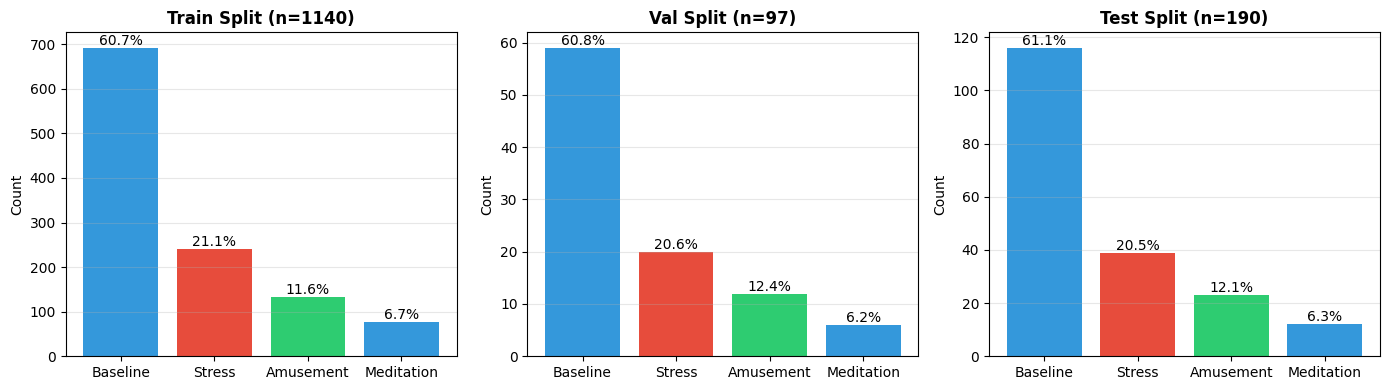

✓ Class balance visualization complete


In [18]:
# Create visualization of class distribution across splits
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

splits_list = [('Train', y_train), ('Val', y_val), ('Test', y_test)]
label_map = {0: 'Baseline', 1: 'Stress', 2: 'Amusement', 3 : 'Meditation'}

for idx, (split_name, y_split) in enumerate(splits_list):
    ax = axes[idx]
    
    counts = y_split['Label'].value_counts().sort_index()
    labels = [label_map[l] for l in counts.index]
    
    ax.bar(labels, counts.values, color=['#3498db', '#e74c3c', '#2ecc71'])
    ax.set_title(f'{split_name} Split (n={len(y_split)})', fontweight='bold')
    ax.set_ylabel('Count')
    ax.grid(True, alpha=0.3, axis='y')
    
    # Add percentage labels
    for i, (count, label) in enumerate(zip(counts.values, labels)):
        pct = 100 * count / len(y_split)
        ax.text(i, count, f'{pct:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("✓ Class balance visualization complete")

## Cell 7: Quality Checks

In [19]:
## Cell 7: Quality Checks

print("QUALITY CHECKS:")
print("="*70)

# Check 1: Total samples preserved
total_split = len(X_train) + len(X_val) + len(X_test)
assert total_split == len(X), f"Sample count mismatch! {total_split} vs {len(X)}"
print("✓ Total samples preserved")

# Check 2: No overlap between splits (check actual data, not indices)
# Store original indices before reset (or use Subject IDs)
train_subjects = set(X_train['Subject'].values)
val_subjects = set(X_val['Subject'].values)
test_subjects = set(X_test['Subject'].values)

assert len(train_subjects & val_subjects) == 0, f"Train-Val subject overlap! {train_subjects & val_subjects}"
assert len(train_subjects & test_subjects) == 0, f"Train-Test subject overlap! {train_subjects & test_subjects}"
assert len(val_subjects & test_subjects) == 0, f"Val-Test subject overlap! {val_subjects & test_subjects}"
print("✓ No overlap between splits (subject-level)")

# Check 3: Correct split ratios (adjusted for 80/10/10)
train_pct = 100 * len(X_train) / len(X)
val_pct = 100 * len(X_val) / len(X)
test_pct = 100 * len(X_test) / len(X)

# Note: With StratifiedGroupKFold, you get ~80/10/10, not 60/20/20
assert 75 < train_pct < 85, f"Train % outside expected range: {train_pct:.1f}%"
assert 5 < val_pct < 15, f"Val % outside expected range: {val_pct:.1f}%"
assert 5 < test_pct < 15, f"Test % outside expected range: {test_pct:.1f}%"
print(f"✓ Split ratios: Train={train_pct:.1f}%, Val={val_pct:.1f}%, Test={test_pct:.1f}%")

# Check 4: No NaN or infinite
for name, X_split in [('Train', X_train), ('Val', X_val), ('Test', X_test)]:
    n_nan = X_split.isnull().sum().sum()
    n_inf = np.isinf(X_split.select_dtypes(include=[np.number])).sum().sum()
    assert n_nan == 0 and n_inf == 0, f"{name} has NaN or Inf!"
print("✓ No NaN or infinite values in splits")

# Check 5: Y labels match indices
assert len(y_train) == len(X_train), "y_train length mismatch!"
assert len(y_val) == len(X_val), "y_val length mismatch!"
assert len(y_test) == len(X_test), "y_test length mismatch!"
print("✓ Y labels match X indices")

# Check 6: All original subjects accounted for
all_subjects = train_subjects | val_subjects | test_subjects
original_subjects = set(X['Subject'].values)
assert all_subjects == original_subjects, "Some subjects missing from splits!"
print("✓ All subjects accounted for")

print("\n" + "="*70)
print("✅ ALL QUALITY CHECKS PASSED")

QUALITY CHECKS:
✓ Total samples preserved
✓ No overlap between splits (subject-level)
✓ Split ratios: Train=79.9%, Val=6.8%, Test=13.3%
✓ No NaN or infinite values in splits
✓ Y labels match X indices
✓ All subjects accounted for

✅ ALL QUALITY CHECKS PASSED


## Cell 8: Save Split Data

In [20]:
# Save all splits
X_train.to_csv('X_train.csv', index=False)
X_val.to_csv('X_val.csv', index=False)
X_test.to_csv('X_test.csv', index=False)

y_train.to_csv('y_train.csv', index=False)
y_val.to_csv('y_val.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

print("✓ Files saved:")
print(f"  - X_train.csv ({X_train.shape})")
print(f"  - X_val.csv ({X_val.shape})")
print(f"  - X_test.csv ({X_test.shape})")
print(f"  - y_train.csv ({y_train.shape})")
print(f"  - y_val.csv ({y_val.shape})")
print(f"  - y_test.csv ({y_test.shape})")

✓ Files saved:
  - X_train.csv ((1140, 85))
  - X_val.csv ((97, 85))
  - X_test.csv ((190, 85))
  - y_train.csv ((1140, 1))
  - y_val.csv ((97, 1))
  - y_test.csv ((190, 1))


## Cell 9: Verify Saved Files

In [ ]:
# Load and verify
print("Verifying saved files...\n")

X_train_check = pd.read_csv('X_train.csv')
X_val_check = pd.read_csv('X_val.csv')
X_test_check = pd.read_csv('X_test.csv')
y_train_check = pd.read_csv('y_train.csv')
y_val_check = pd.read_csv('y_val.csv')
y_test_check = pd.read_csv('y_test.csv')

print("Loaded files:")
print(f"  X_train: {X_train_check.shape}")
print(f"  X_val:   {X_val_check.shape}")
print(f"  X_test:  {X_test_check.shape}")
print(f"  y_train: {y_train_check.shape}")
print(f"  y_val:   {y_val_check.shape}")
print(f"  y_test:  {y_test_check.shape}")

print("\n✅ All files verified and ready!")

Verifying saved files...

Loaded files:
  X_train: (1140, 85)
  X_val:   (97, 85)
  X_test:  (190, 85)
  y_train: (1140, 1)
  y_val:   (97, 1)
  y_test:  (190, 1)

✅ All files verified and ready!


: 